# 1. Data Processing

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.precision', 3)

In [2]:
# import plant 2 data
generation_data = pd.read_csv('./solar/Plant_1_Generation_Data.csv')
weather_data = pd.read_csv('./solar/Plant_1_Weather_Sensor_Data.csv')

In [3]:
generation_data.sample(5).style.set_properties(
    **{
        'background-color': 'OliveDrab',
        'color': 'white',
        'border-color': 'darkblack'
    })

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
62088,14-06-2020 19:15,4135001,zBIq5rxdHJRwDNY,0.000000,0.000000,7315.000000,6565137.000000
65624,16-06-2020 11:30,4135001,pkci93gMrogZuBj,5866.500000,574.837500,3026.875000,7406243.875000
49834,09-06-2020 00:00,4135001,zBIq5rxdHJRwDNY,0.000000,0.000000,1194.000000,6523269.000000
61654,14-06-2020 14:30,4135001,McdE0feGgRqW7Ca,8734.750000,853.850000,5860.250000,7387783.250000
62569,15-06-2020 00:45,4135001,uHbuxQJl8lW7ozc,0.000000,0.000000,0.000000,7267837.000000


In [4]:
weather_data.sample(5).style.set_properties(
    **{
        'background-color': 'pink',
        'color': 'Black',
        'border-color': 'darkblack'
    })

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
2891,2020-06-14 23:15:00,4135001,HmiyD2TTLFNqkNe,23.331081,21.470425,0.000000
3181,2020-06-17 23:45:00,4135001,HmiyD2TTLFNqkNe,21.909288,20.427972,0.000000
2029,2020-06-05 23:45:00,4135001,HmiyD2TTLFNqkNe,22.524619,19.794250,0.000000
1126,2020-05-27 09:30:00,4135001,HmiyD2TTLFNqkNe,28.570597,49.266514,0.690779
557,2020-05-21 09:45:00,4135001,HmiyD2TTLFNqkNe,27.690804,51.029305,0.772238


In [5]:
# adjust time format
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'],format = '%d-%m-%Y %H:%M')
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'],format = '%Y-%m-%d %H:%M:%S')

In [6]:
# merge two dataframe
df_solar = pd.merge(generation_data.drop(columns = ['PLANT_ID']), weather_data.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
df_solar.sample(5).style.background_gradient(cmap='cool')

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
48550,2020-06-08 09:30:00,sjndEbLyjtCKgGv,11099.500000,1083.916667,1307.833333,7193861.833000,26.860955,51.026215,0.846233
34355,2020-06-01 14:00:00,bvBOhCH3iADSZry,2696.571429,264.085714,4654.714286,6437921.714000,28.712758,40.057369,0.193769
49745,2020-06-08 23:15:00,1IF53ai7Xc0U56Y,0.000000,0.000000,8495.000000,6371833.000000,22.929185,20.342743,0.000000
14622,2020-05-22 16:45:00,WRmjgnKYAwPKWDb,1939.875000,190.187500,7101.875000,7084459.875000,29.846668,33.622705,0.135876
25399,2020-05-27 23:30:00,z9Y9gH1T5YWrNuG,0.000000,0.000000,0.000000,7103885.000000,23.474221,22.347420,0.000000


In [7]:
# adding separate time and date columns
df_solar["DATE"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.date
df_solar["TIME"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.time
df_solar['DAY'] = pd.to_datetime(df_solar['DATE_TIME']).dt.day
df_solar['MONTH'] = pd.to_datetime(df_solar['DATE_TIME']).dt.month
df_solar['WEEK'] = pd.to_datetime(df_solar['DATE_TIME']).dt.isocalendar().week


# add hours and minutes for ml models
df_solar['HOURS'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.hour
df_solar['MINUTES'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.minute
df_solar['TOTAL MINUTES PASS'] = df_solar['MINUTES'] + df_solar['HOURS']*60

# add date as string column
df_solar["DATE_STRING"] = df_solar["DATE"].astype(str) # add column with date as string
df_solar["HOURS"] = df_solar["HOURS"].astype(str)
df_solar["TIME"] = df_solar["TIME"].astype(str)

df_solar.head(2)

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING
0,2020-05-15,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6.260e+06,25.184,22.858,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15
1,2020-05-15,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6.184e+06,25.184,22.858,0.0,2020-05-15,00:00:00,15,5,20,0,0,0,2020-05-15


In [8]:
df_solar.describe().style.background_gradient(cmap='rainbow')

,DATE_TIME,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAY,MONTH,WEEK,MINUTES,TOTAL MINUTES PASS
count,68774,68774.000000,68774.000000,68774.000000,68774.000000,68774.000000,68774.000000,68774.000000,68774.000000,68774.000000,68774.000000,68774.000000,68774.000000
mean,2020-06-01 08:02:38.161514240,3147.177450,307.778375,3295.834644,6978727.511362,25.558521,31.244997,0.232305,15.762876,5.518539,22.549481,22.490621,716.515107
min,2020-05-15 00:00:00,0.000000,0.000000,0.000000,6183645.000000,20.398505,18.140415,0.000000,1.000000,5.000000,20.000000,0.000000,0.000000
25%,2020-05-24 00:33:45,0.000000,0.000000,0.000000,6512006.826000,22.724491,21.123944,0.000000,9.000000,5.000000,21.000000,0.000000,360.000000
50%,2020-06-01 14:15:00,428.571429,41.450000,2658.473214,7146685.000000,24.670178,24.818984,0.031620,16.000000,6.000000,23.000000,15.000000,720.000000
75%,2020-06-09 20:00:00,6365.468750,623.561161,6274.000000,7268751.397000,27.960429,41.693659,0.454880,23.000000,6.000000,24.000000,30.000000,1065.000000
max,2020-06-17 23:45:00,14471.125000,1410.950000,9163.000000,7846821.000000,35.252486,65.545714,1.221652,31.000000,6.000000,25.000000,45.000000,1425.000000
std,nan,4036.441826,394.394865,3145.220597,416270.720885,3.361300,12.308283,0.301948,8.554460,0.499660,1.461138,16.772385,412.069969


In [9]:
# converting 'SOURCE_KEY' from categorical form to numerical form
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_solar['SOURCE_KEY_NUMBER'] = encoder.fit_transform(df_solar['SOURCE_KEY'])
df_solar.sample(5)

,DATE_TIME,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DATE,TIME,DAY,MONTH,WEEK,HOURS,MINUTES,TOTAL MINUTES PASS,DATE_STRING,SOURCE_KEY_NUMBER
66849,2020-06-17 01:30:00,bvBOhCH3iADSZry,0.000,0.000,0.000,6.534e+06,22.687,21.248,0.000,2020-06-17,01:30:00,17,6,25,1,30,90,2020-06-17,11
46646,2020-06-07 12:00:00,McdE0feGgRqW7Ca,13255.750,1292.438,3737.125,7.335e+06,28.042,56.313,1.018,2020-06-07,12:00:00,7,6,23,12,0,720,2020-06-07,4
2504,2020-05-16 08:15:00,3PZuoBAID5Wc2HD,5015.500,491.712,457.750,6.994e+06,24.428,33.009,0.339,2020-05-16,08:15:00,16,5,20,8,15,495,2020-05-16,2
60548,2020-06-14 02:00:00,3PZuoBAID5Wc2HD,0.000,0.000,0.000,7.211e+06,22.802,21.804,0.000,2020-06-14,02:00:00,14,6,24,2,0,120,2020-06-14,2
59030,2020-06-13 08:45:00,3PZuoBAID5Wc2HD,8043.714,787.329,954.857,7.203e+06,26.138,41.558,0.521,2020-06-13,08:45:00,13,6,24,8,45,525,2020-06-13,2


# 2. Data visualization

### 2.1 Frequency of each temperature value

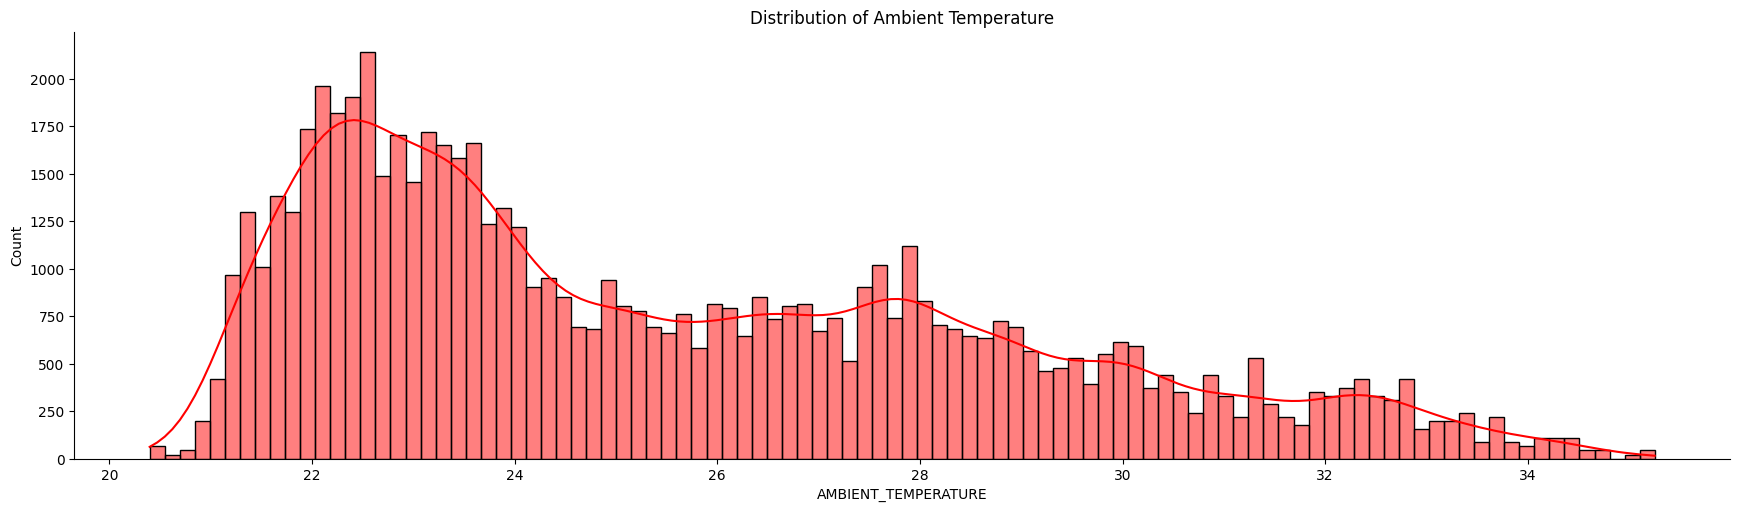

In [10]:
# how frequently each temperature value occurs
sns.displot(data=df_solar, x="AMBIENT_TEMPERATURE", kde=True, bins=100, color="red", height=5, aspect=3.5)
plt.title('Distribution of Ambient Temperature')
plt.show()

In [11]:
df_solar['DATE'].nunique()

34

### 2.2 DC Power analysis

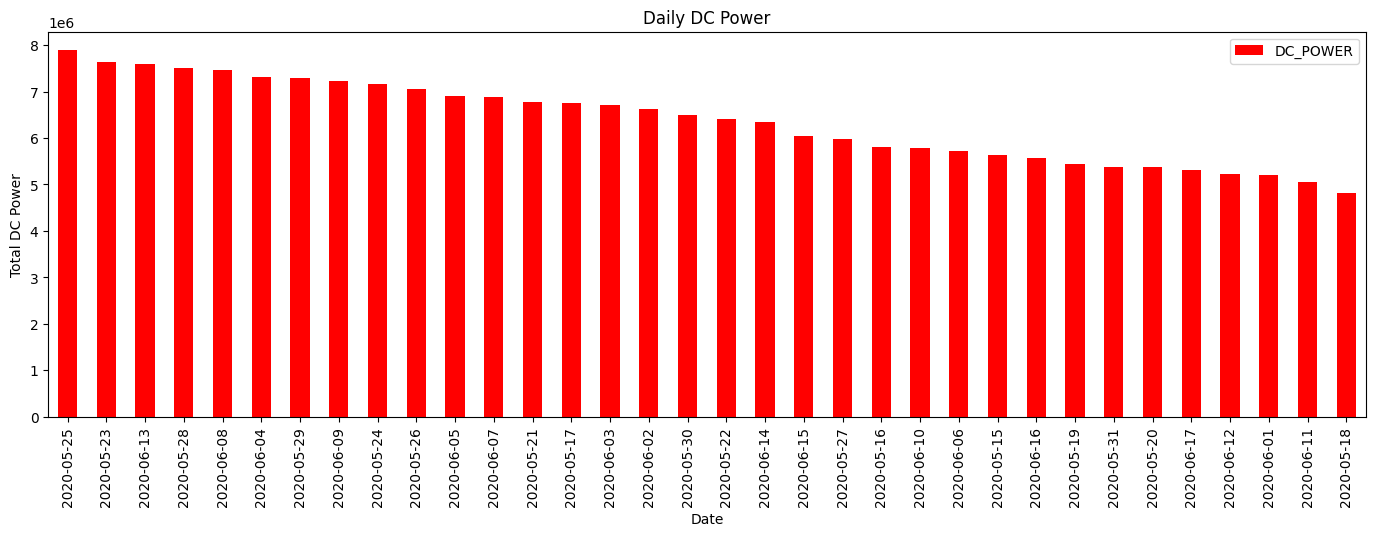

In [12]:
# Calculate daily sum of DC power
daily_dc = df_solar.groupby('DATE')['DC_POWER'].agg('sum')

# Plot daily DC power
ax = daily_dc.sort_values(ascending=False).plot.bar(figsize=(17, 5), legend=True, color='red')
plt.title('Daily DC Power')
plt.xlabel('Date')
plt.ylabel('Total DC Power')
plt.show()

highest: 2020-05-25
lowest: 2020-05-18

#### (a) highest: 2020-05-25

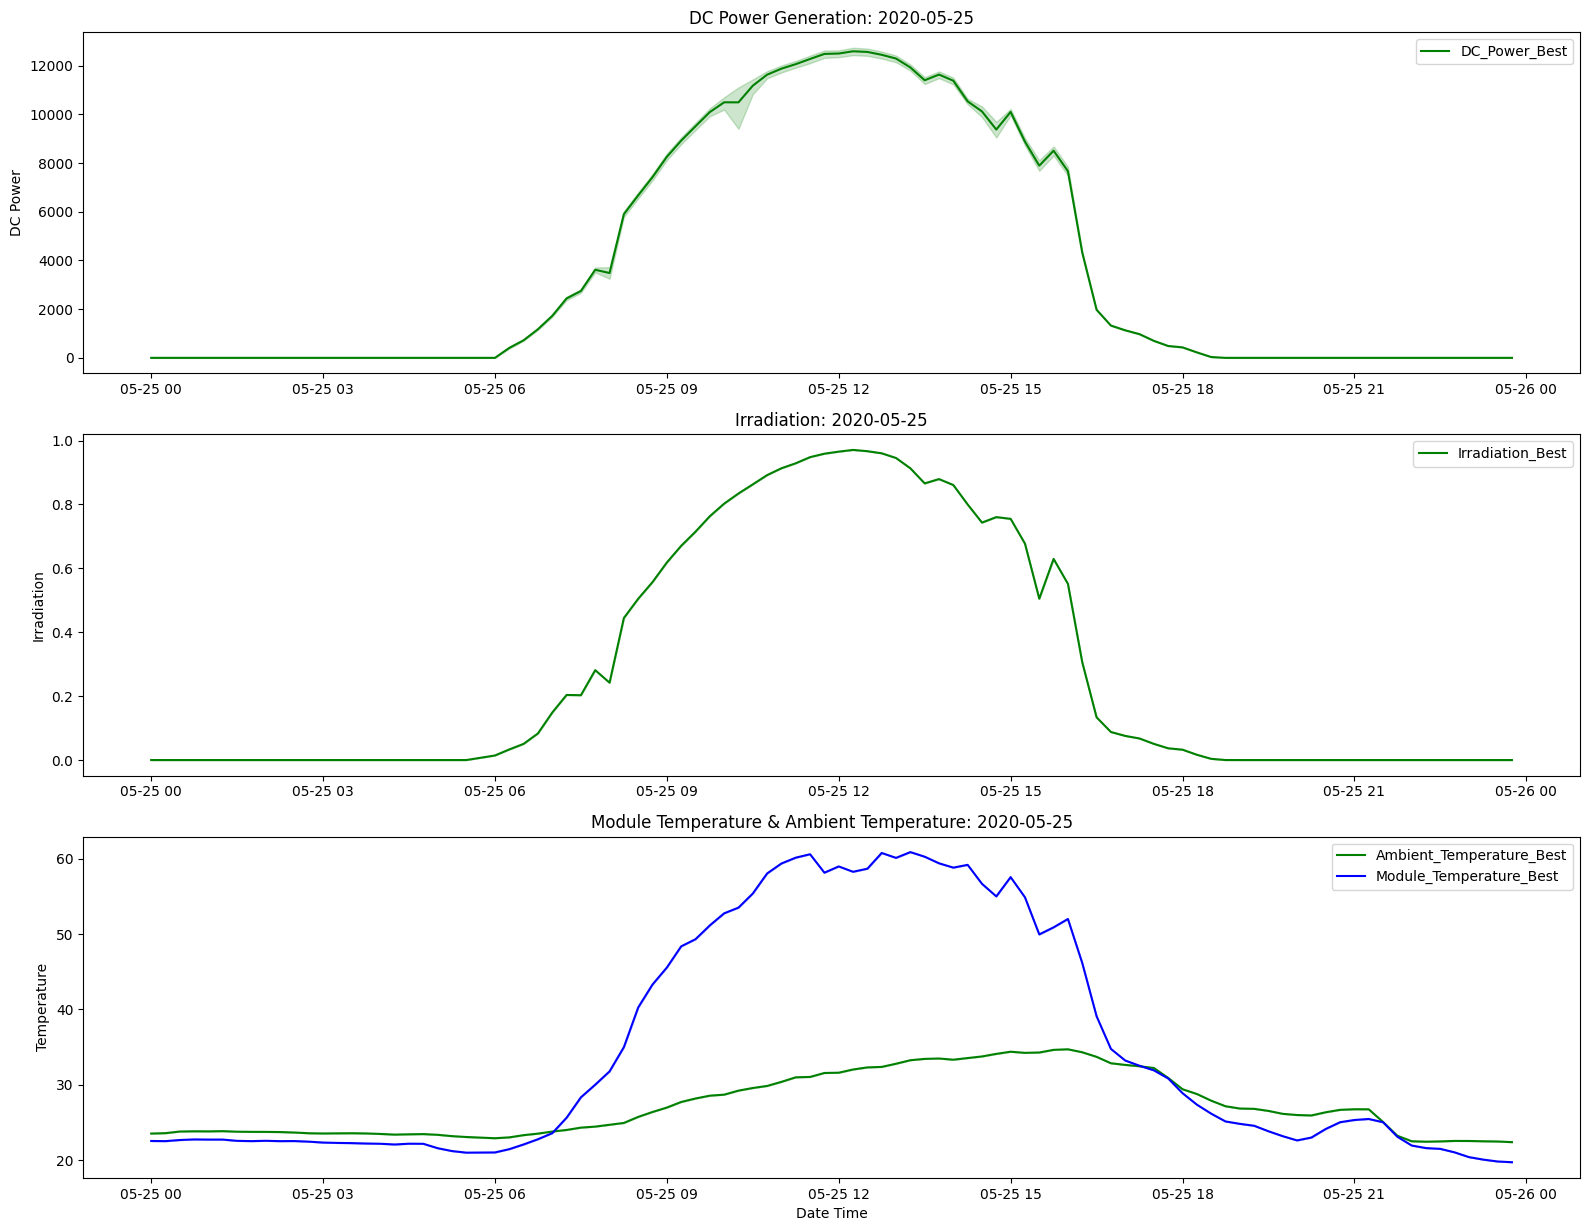

In [13]:
plt.figure(figsize=(16,16))

date=["2020-05-25"]

plt.subplot(411)
sns.lineplot(x='DATE_TIME', y='DC_POWER', data=df_solar[df_solar["DATE_STRING"].isin(date)], label="DC_Power_Best", color='green')
plt.title("DC Power Generation: {}".format(date[0]))
plt.xlabel('')
plt.ylabel('DC Power')

plt.subplot(412)
sns.lineplot(x='DATE_TIME', y='IRRADIATION', data=df_solar[df_solar["DATE_STRING"].isin(date)], label="Irradiation_Best", color='green')
plt.title("Irradiation: {}".format(date[0]))
plt.xlabel('')
plt.ylabel('Irradiation')

plt.subplot(413)
sns.lineplot(x='DATE_TIME', y='AMBIENT_TEMPERATURE', data=df_solar[df_solar["DATE_STRING"].isin(date)], label="Ambient_Temperature_Best", color='green')
sns.lineplot(x='DATE_TIME', y='MODULE_TEMPERATURE', data=df_solar[df_solar["DATE_STRING"].isin(date)], label="Module_Temperature_Best", color='blue')
plt.title("Module Temperature & Ambient Temperature: {}".format(date[0]))
plt.xlabel('Date Time')
plt.ylabel('Temperature')

plt.tight_layout()
plt.show()

#### (b) loweset: 2020-05-18

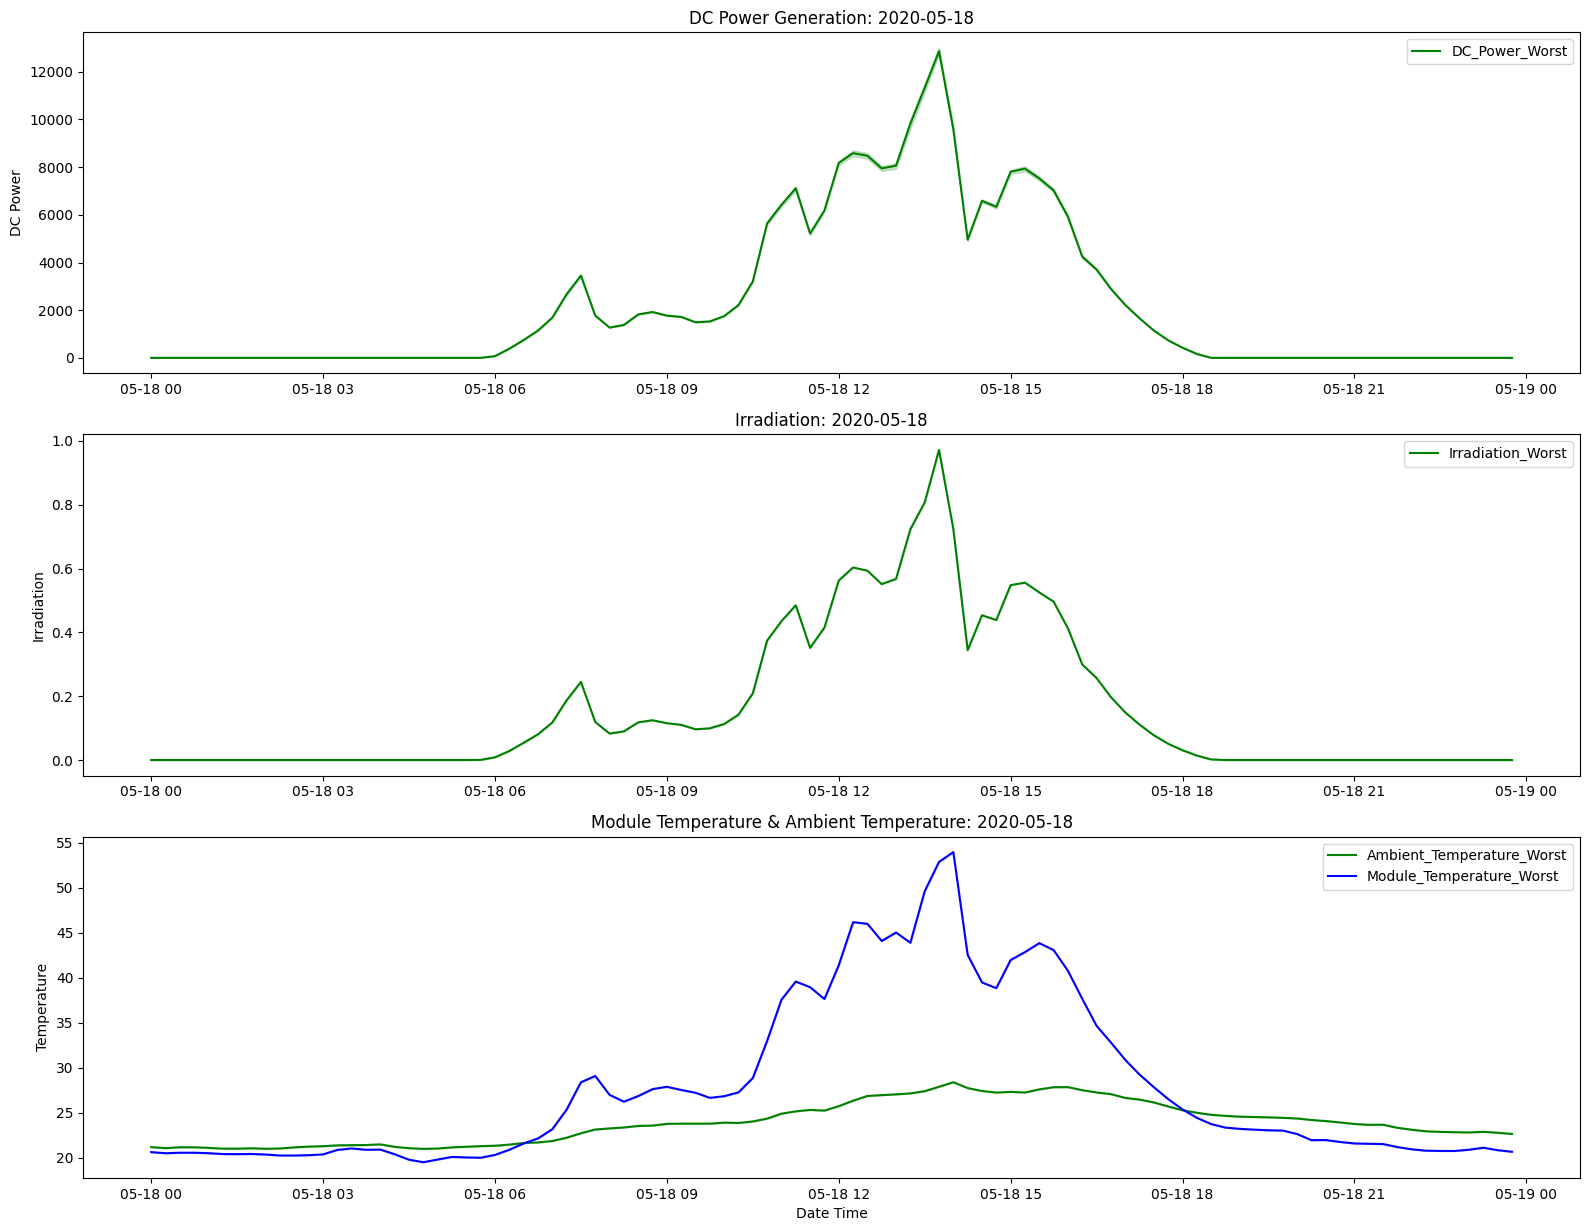

In [14]:
plt.figure(figsize=(16,16))

date=["2020-05-18"]

plt.subplot(411)
sns.lineplot(x='DATE_TIME', y='DC_POWER', data=df_solar[df_solar["DATE_STRING"].isin(date)], label="DC_Power_Worst", color='green')
plt.title("DC Power Generation: {}".format(date[0]))
plt.xlabel('')
plt.ylabel('DC Power')

plt.subplot(412)
sns.lineplot(x='DATE_TIME', y='IRRADIATION', data=df_solar[df_solar["DATE_STRING"].isin(date)], label="Irradiation_Worst", color='green')
plt.title("Irradiation: {}".format(date[0]))
plt.xlabel('')
plt.ylabel('Irradiation')

plt.subplot(413)
sns.lineplot(x='DATE_TIME', y='AMBIENT_TEMPERATURE', data=df_solar[df_solar["DATE_STRING"].isin(date)], label="Ambient_Temperature_Worst", color='green')
sns.lineplot(x='DATE_TIME', y='MODULE_TEMPERATURE', data=df_solar[df_solar["DATE_STRING"].isin(date)], label="Module_Temperature_Worst", color='blue')
plt.title("Module Temperature & Ambient Temperature: {}".format(date[0]))
plt.xlabel('Date Time')
plt.ylabel('Temperature')

plt.tight_layout()
plt.show()

# 3. Traning by using different model

In [15]:
# data prepare
df_ml = df_solar.copy()
X = df_ml[['DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION']]
y = df_ml['AC_POWER']

In [16]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3.1 Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

lr_score = lr_model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE is {mse}")
print(f"R^2 Score is {lr_score*100:.4f} %")

MSE is 3065.9900713323427
R^2 Score is 98.0130 %


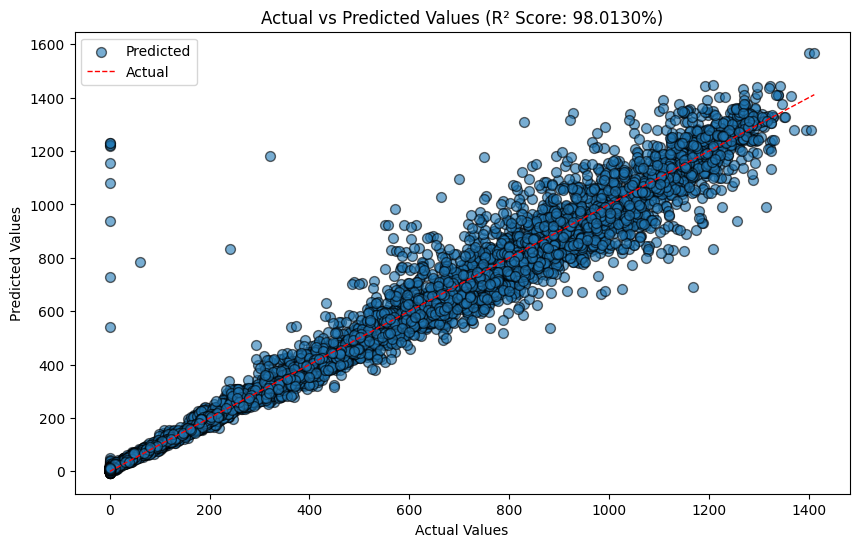

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k', s=50, label='Predicted') 
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=1, label='Actual') 
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted Values (R² Score: {lr_score*100:.4f}%)')
plt.legend()
plt.show()

### 3.2 Decision Tree

In [19]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

y_pred = dtr.predict(X_test)

dtr_score = dtr.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE is {mse}")
print(f"R^2 Score is {dtr_score*100:.4f} %")

MSE is 2295.3520535540924
R^2 Score is 98.5125 %


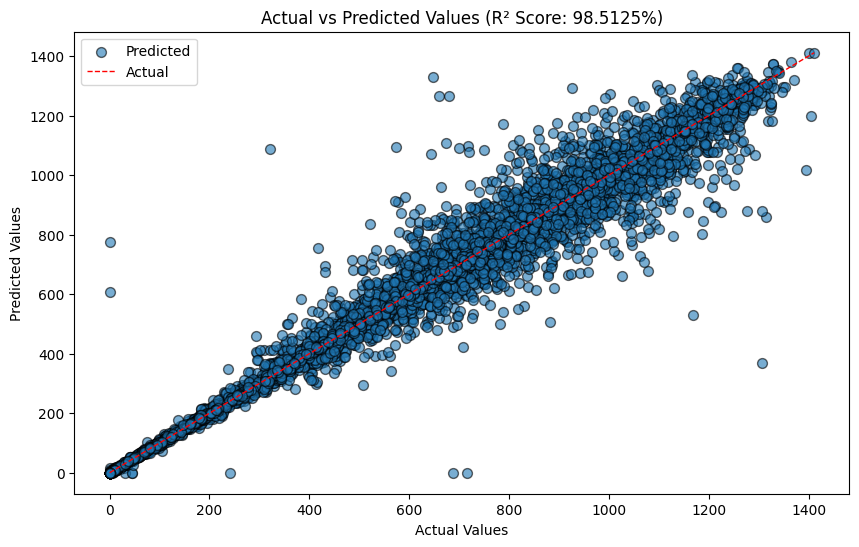

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k', s=50, label='Predicted')  
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=1, label='Actual') 
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted Values (R² Score: {dtr_score*100:.4f}%)')
plt.legend()
plt.show()

### 3.3 Random Forest

In [21]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

rfr_score = rfr.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE is {mse}")
print(f"R^2 Score is {rfr_score*100:.4f} %")

MSE is 1392.893377274452
R^2 Score is 99.0973 %


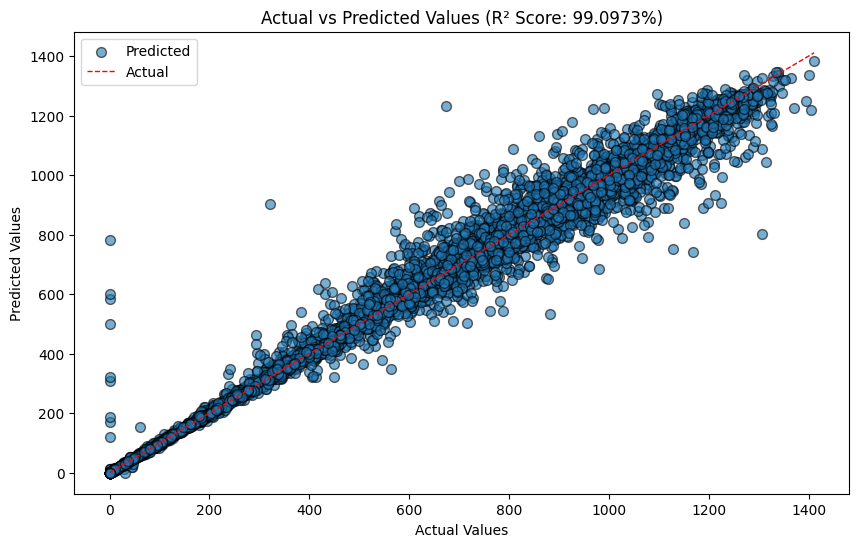

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k', s=50, label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=1, label='Actual') 
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs Predicted Values (R² Score: {rfr_score*100:.4f}%)')
plt.legend()
plt.show()

# 5. Predict next few days

### Since Random Forest Regression have largest $R^2$, we use RFR to do the prediction.

In [23]:
# Filter the dataset to include only daytime data (e.g., between 6 AM and 6 PM)
daytime_data = df_solar[(df_solar['HOURS'].astype(int) >= 6) & (df_solar['HOURS'].astype(int) <= 18)]

# Generate a future date range for the next 10 days (one prediction per day)
future_dates = pd.date_range(start=df_solar['DATE'].max(), periods=10, freq='D')

# Sample weather data for simulation
future_weather_data = daytime_data.sample(n=10, replace=True, random_state=42)[['DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']]

future_predictions = rfr.predict(future_weather_data)

future_df = pd.DataFrame({'DATE_TIME': future_dates, 'PREDICTED_AC_POWER': future_predictions})
print(future_df)

   DATE_TIME  PREDICTED_AC_POWER
0 2020-06-17            1178.954
1 2020-06-18             466.559
2 2020-06-19            1184.942
3 2020-06-20            1194.158
4 2020-06-21             856.961
5 2020-06-22             715.212
6 2020-06-23              35.966
7 2020-06-24             782.683
8 2020-06-25             864.386
9 2020-06-26             719.381


# 6. Identify the need for panel cleaning/maintenance

### To identify the need for cleaning, we first need to find the date that the efficiency decreases. 

### Performance Ratio: Represents a metric used to assess the overall performance of a solar panel system and accounts for losses due to shading, soiling, temperature, and other factors. It is calculated by dividing the actual energy output (AC power) by the expected energy output based on ideal conditions (irradiation and module temperature) as follows:

```
Performance Ratio = (AC Power / (Irradiation * Module Temperature)) * 100
```

### Also, if we want to investigate given panels, we can then only choose the specific 'SOURCE_KEY' for that panel.

2020-05-21
2997.742437587765


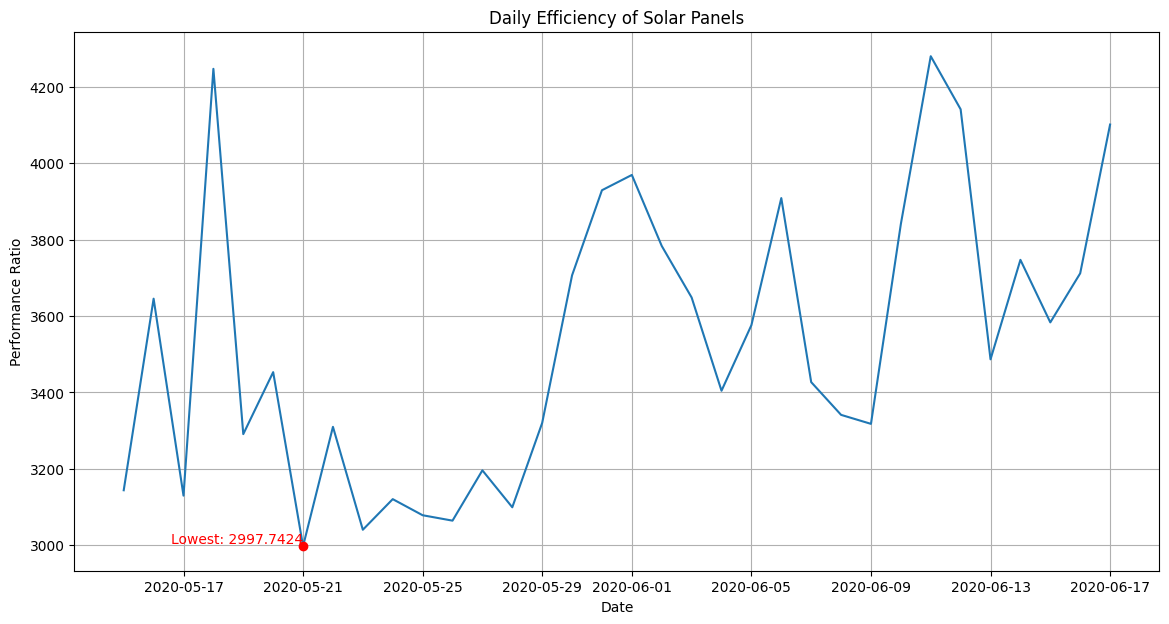

In [31]:
# Calculate Performance Ratio
df_solar['PERFORMANCE_RATIO'] = (df_solar['AC_POWER'] / (df_solar['IRRADIATION'] * df_solar['MODULE_TEMPERATURE'])) * 100

# Replace infinite values with NaN
df_solar['PERFORMANCE_RATIO'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows with NaN values in PERFORMANCE_RATIO
df_solar.dropna(subset=['PERFORMANCE_RATIO'], inplace=True)

# Group by date to analyze daily efficiency
daily_efficiency = df_solar.groupby('DATE')['PERFORMANCE_RATIO'].mean()

# Identify the date with the lowest efficiency
lowest_efficiency_date = daily_efficiency.idxmin()
lowest_efficiency_value = daily_efficiency.min()
print(lowest_efficiency_date)
print(lowest_efficiency_value)

plt.figure(figsize=(14, 7))
daily_efficiency.plot()
plt.scatter(lowest_efficiency_date, lowest_efficiency_value, color='red', zorder=5)
plt.text(lowest_efficiency_date, lowest_efficiency_value, f'Lowest: {lowest_efficiency_value:.4f}', 
         horizontalalignment='right', verticalalignment='bottom', color='red')
plt.title('Daily Efficiency of Solar Panels')
plt.xlabel('Date')
plt.ylabel('Performance Ratio')
plt.grid(True)
plt.show()

### The efficiency drop means the panels need to be cleaned. From the graph we can tell the panel need to be cleaned on 2020-5-21.

# 7. Identify faulty or suboptimally performing equipment

### The first few rows indicates faulty or suboptimally performing equipments.

In [30]:
# Group by SOURCE_KEY and calculate the mean Performance Ratio
performance_ratio_by_source_key = df_solar.groupby('SOURCE_KEY')['PERFORMANCE_RATIO'].mean().reset_index()

# Display the result
performance_ratio_by_source_key.sort_values(by='PERFORMANCE_RATIO', ascending=True, inplace=True)
performance_ratio_by_source_key.head()

,SOURCE_KEY,PERFORMANCE_RATIO
11,bvBOhCH3iADSZry,3223.680
0,1BY6WEcLGh8j5v7,3272.713
13,ih0vzX44oOqAx2f,3495.374
9,ZoEaEvLYb1n2sOq,3503.625
20,zBIq5rxdHJRwDNY,3516.294
